In [1]:
import torch
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

print("torch: {}".format(torch.__version__))

torch: 1.13.0


### Import a preset dataset "FashionMNIST"

Yuta's comment:
It is important to understand the data structure of which PyTorch is going to handle.
As a first step, let's use the preset dataset called "FashionMNIST". (Fashion image version of MNIST) Please note that we usually need to create our own **torch.utils.data.Dataset** class by ourselves, and eventually **torch.utils.data.DataLoader** with parameter of batch size, sampling method, and so on. More Info [here.](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
# check the class of each dataset
print(type(training_data))
print(type(test_data))

# check the size of each dataset
print(len(training_data))
print(len(test_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>
60000
10000


In [4]:
# If we see an image, it only shows a tensor, instead of the visualised image itself.
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# check the class of a image (it is nested in tuple, where the first component is torch.Tensor and the other is label number.)
print(type(training_data[0][0]))

# check the size of a image (you can confirm that it is 28*28 black-white image)
print(training_data[0][0].shape)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


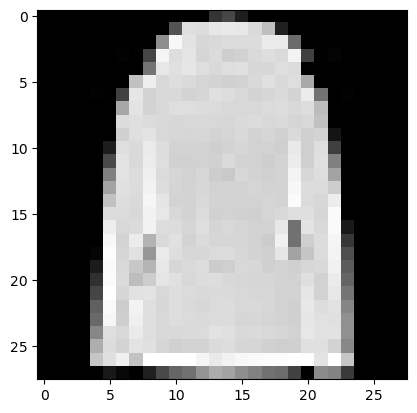

In [20]:
# let's visualise the image
plt.imshow(training_data[0][0].squeeze(), cmap="gray")

In [7]:
# the category of this dataset is stored in an attribute "classes".
print(training_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [21]:
# let's see the category of the first image.
print(training_data.classes[training_data[0][1]])

Coat


**torch.utils.data.DataLoader** is a class which can deal with **torch.utils.data.Dataset**, so that we can train and validate the model efficiently (we only have to put the number od batch size, then PyTorch will process the data splitting automatically).

In [9]:
# create data loaders
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Please note that if you want to create your own **torch.utils.data.Dataset**, you need to specify __init__, __len__, and __getitem__. (These are used in a model afterwards)

### Create a model

Now it's time to build a model!

In [10]:
# Get cpu or gpu device for training. If you don't use NVIDIA's GPU, CPU will be automatically chosen.
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cpu


In [11]:
class OurOwnFirstNetwork(nn.Module):
    def __init__(self):
        # inherit the class of nn.Module (this is a convention of pytorch)
        super().__init__()
        
        # flatten is to make a tensor into one single vector (ex. 1*28*28 -> 784)
        self.flatten = nn.Flatten()
        
        # build a three-layer neural network with activation of ReLU.
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    # this method "forward" will be used when the model excutes forward propagation.
    # you can imagine that "x" is a single image.
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [12]:
# let's create an instance from our class.
our_model = OurOwnFirstNetwork().to(device)
print(our_model)

OurOwnFirstNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
# we need to specify the loss function of this model, as well as the method of its optimisation.
# in this case, we are going to use cross entropy loss with SGD.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr=1e-3)

### Train the model

Now let's train the model! To do so, we need to make some new functions out of our class definition.

In [14]:
def train_our_model(dataloader, model, loss_fn, optimizer):
    
    #  the total size of this dataloader (in this case we will inspect the one for training)
    size = len(dataloader.dataset)
    
    # use the method of "train" from our created instance (it is hard to understand because it is from nn.Module)
    model.train()
    
    # for each of batch
    for batch, (X, y) in enumerate(dataloader):
        # whether we use CUDA or not
        X, y = X.to(device), y.to(device)
        
        # If we put "X" into our instance, pytorch will process the forward propergation.
        pred = model(X)
        
        # based on the prediction, we need to calculate the loss function
        loss = loss_fn(pred, y)

        # now it's time to do back propagation! Firstly, we need to reset the gradient in advance (this happens in every loop).
        optimizer.zero_grad()
        
        # do the back propagation! In this method of "backward" from nn.Module, pytorch is calculating the gradient.
        loss.backward()
        
        # based on the calculated gradient for each neuron, we can take a step of optimisation.
        optimizer.step()
        
        # this is for convenience of seeing the progress of training (only showing every 100 batches)
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")   

As well as the train function, we need to create a function for test.

In [15]:
def test_our_model(dataloader, model, loss_fn):
    
    # get the total size of this dataloader (in this case we will inspect the one for testing)
    size = len(dataloader.dataset)
    
    # the length of dataloader is the number of batches, so we will get it
    # the reason why we did'nt do this in the train function is we wanted to see the progress of training using the enumeration.
    num_batches = len(dataloader)

    # use the method of eval from our instance (this method comes originally from nn.Module)
    model.eval()
    
    # initialise the loss and correct prediction number as 0
    test_loss, correct = 0, 0
    
    # disable the gradient calculation, since we won't do back propagation
    with torch.no_grad():
        for X, y in dataloader:
            
            # use CUDA if available
            X, y = X.to(device), y.to(device)

            # put the "X" into our trained model
            pred = model(X)
            
            # pile the loss from each batch
            test_loss += loss_fn(pred, y).item()
            
            # from the logit, we will take argmax to explicitly predict a label for each image.
            # it the prediction from argmax is correct, we will add it to "correct"
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        
        # average out the test loss after all the testing is finished.
        test_loss /= num_batches
        
        # average out the "correct" after all the testing is finished.
        correct /= size

        # show the result
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [16]:
# set the number of epoch (how many times we will use the whole training dataset)
epochs = 5

# for each of the epoch, we will do train & test.
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    
    # do the train!
    train_our_model(train_dataloader, our_model, loss_fn, optimizer)
    
    # do the test!
    test_our_model(test_dataloader, our_model, loss_fn)
    
print("Done!")

Epoch 1
-------------------------------
loss: 2.305804  [    0/60000]
loss: 2.290419  [ 6400/60000]
loss: 2.277578  [12800/60000]
loss: 2.274362  [19200/60000]
loss: 2.254799  [25600/60000]
loss: 2.233813  [32000/60000]
loss: 2.232197  [38400/60000]
loss: 2.208999  [44800/60000]
loss: 2.199719  [51200/60000]
loss: 2.179492  [57600/60000]
Test Error: 
 Accuracy: 49.7%, Avg loss: 2.169364 

Epoch 2
-------------------------------
loss: 2.172896  [    0/60000]
loss: 2.166924  [ 6400/60000]
loss: 2.117221  [12800/60000]
loss: 2.139504  [19200/60000]
loss: 2.100432  [25600/60000]
loss: 2.031985  [32000/60000]
loss: 2.060431  [38400/60000]
loss: 1.989859  [44800/60000]
loss: 1.984090  [51200/60000]
loss: 1.932695  [57600/60000]
Test Error: 
 Accuracy: 56.9%, Avg loss: 1.926222 

Epoch 3
-------------------------------
loss: 1.943894  [    0/60000]
loss: 1.926046  [ 6400/60000]
loss: 1.819224  [12800/60000]
loss: 1.867050  [19200/60000]
loss: 1.771091  [25600/60000]
loss: 1.696237  [32000/600

### Predict image labels

Now the model is trained! Let's see how it works.

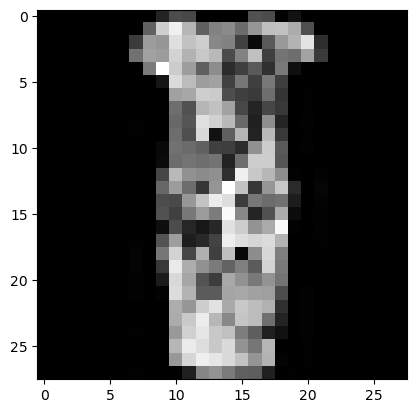

In [24]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [25]:
# get the predicted outcome
predicted_outcome = our_model(test_data[0][0])
print(predicted_outcome)

# get the id
predicted_id = int(predicted_outcome.argmax())
print(predicted_id)

# get the label
predicted_label = test_data.classes[predicted_id]
print(predicted_label)

tensor([[ 1.5635,  2.3077, -0.0655,  2.5371,  0.3295, -1.5189,  0.6700, -2.0918,
         -1.3135, -1.7355]], grad_fn=<AddmmBackward0>)
3
Dress


### Save the model

When we will use the model with its trained parameters, we can save it as "pth".

In [19]:
torch.save(our_model.state_dict(), "../data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth
